In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


[Fashion MNIST kaggle page](https://www.kaggle.com/zalando-research/fashionmnist)  

![](https://cn.bing.com/th?id=OIP.W7_meCnGv3DzL2DBSS1n9wAAAA&pid=Api&rs=1&p=0)

In [25]:
# helper
def y2indicator(Y):
    N = len(Y)
    K = len(set(Y))
    I = np.zeros((N, K))
    I[np.arange(N), Y] = 1
    return I


In [2]:
# get the data
# https://www.kaggle.com/zalando-research/fashionmnist
data = pd.read_csv('./large_files/fashionmnist/fashion-mnist_train.csv')
data = data.values
np.random.shuffle(data)

X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)



In [18]:
X.shape,Y.shape,Y[0],Y[10]

((60000, 28, 28, 1), (60000,), 8, 6)

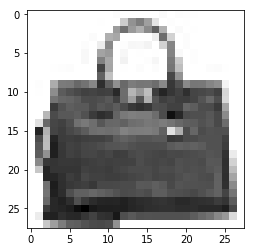

In [13]:
%matplotlib inline
from PIL import Image

plt.imshow(X[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [26]:
# get shapes
# N = len(Y)
K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Y = y2indicator(Y)


In [19]:
N = len(Y)
K = len(set(Y))
I = np.zeros((N, K))
I[np.arange(N), Y] = 1

In [22]:
N,K,I.shape

(60000, 10, (60000, 10))

In [23]:
I

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:

# the model will be a sequence of layers
model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))



In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
